In [1]:
#train code

In [9]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [10]:
print(cv2.__version__)

4.6.0


In [11]:
box = pd.read_csv('./train_solution_bounding_boxes (1).csv')
box

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


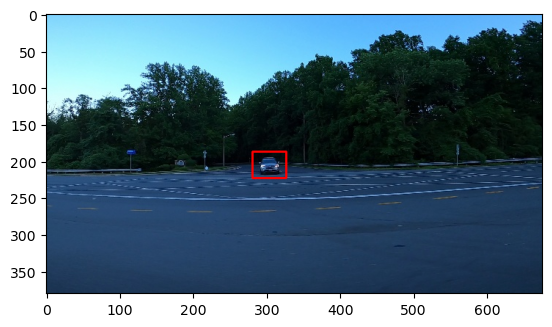

In [12]:
sample = cv2.imread('./training_images/vid_4_1000.jpg')
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
point = box.iloc[0]
pt1 = (int(point['xmin']), int(point['ymax']))
pt2 = (int(point['xmax']), int(point['ymin']))
cv2.rectangle(sample, pt1, pt2, color=(255,0,0), thickness=2)
plt.imshow(sample)

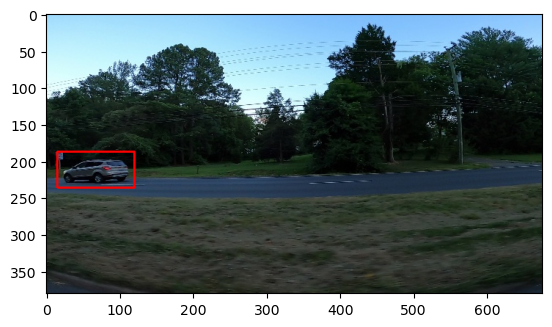

In [13]:
sample = cv2.imread('./training_images/vid_4_10000.jpg')
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
point = box.iloc[1]
pt1 = (int(point['xmin']), int(point['ymax']))
pt2 = (int(point['xmax']), int(point['ymin']))
cv2.rectangle(sample, pt1, pt2, color=(255,0,0), thickness=2)
plt.imshow(sample)

In [14]:
cv2.getBuildInformation()

'\nGeneral configuration for OpenCV 4.6.0 =====================================\n  Version control:               4.6.0-dirty\n\n  Platform:\n    Timestamp:                   2022-06-07T12:50:51Z\n    Host:                        Linux 4.9.140-tegra aarch64\n    CMake:                       3.22.5\n    CMake generator:             Unix Makefiles\n    CMake build tool:            /bin/gmake\n    Configuration:               Release\n\n  CPU/HW features:\n    Baseline:                    NEON FP16\n\n  C/C++:\n    Built as dynamic libs?:      NO\n    C++ standard:                11\n    C++ Compiler:                /opt/rh/devtoolset-10/root/usr/bin/c++  (ver 10.2.1)\n    C++ flags (Release):         -Wl,-strip-all   -fsigned-char -W -Wall -Wreturn-type -Wnon-virtual-dtor -Waddress -Wsequence-point -Wformat -Wformat-security -Wmissing-declarations -Wundef -Winit-self -Wpointer-arith -Wshadow -Wsign-promo -Wuninitialized -Wsuggest-override -Wno-delete-non-virtual-dtor -Wno-comment -Wimpli

In [15]:
# Yolo 로드
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

IndexError: invalid index to scalar variable.

In [12]:
# Yolo 로드
net = cv2.dnn.readNet("./yolov3.weights", "./yolov3.cfg")
classes = []
with open("./coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

AttributeError: module 'cv2' has no attribute 'dnn'

In [16]:
!pwd
# /home/sb020518/DLCV/Detection/yolo

import os
#가급적 절대 경로 사용. 
CUR_DIR = os.path.abspath('.')
weights_path = os.path.join(CUR_DIR, './yolov3.weights')
config_path =  os.path.join(CUR_DIR, './yolov3.cfg')
#config 파일 인자가 먼저 옴. 
cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

/home/jovyan/study_python/_object_detection


In [17]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [18]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [19]:
#전체 Darknet layer에서 13x13 grid, 26x26, 52x52 grid에서 detect된 Output layer만 filtering
layer_names = cv_net_yolo.getLayerNames()
x = np.int32(10)
print(x)
# layer_names : ['conv_0', 'bn_0', 'relu_1', 'conv_1', 'bn_1', 'relu_2', 'conv_ ....
outlayer_names = [layer_names[i[0] - 1] for i in cv_net_yolo.getUnconnectedOutLayers()]
# cv_net_yolo.getUnconnectedOutLayers() : [[200], [227], [254]]

print('output_layer name:', outlayer_names)

# Yolov3 416는 416 x 416 Input을 받는다. 원본 이미지 배열을 사이즈 (416, 416)으로, BGR을 RGB로 변환하여 배열 입력
# blobFromImage를 사용해서 CNN에 넣어야할 이미지 전처리를 쉽게 한다.
# DarkNet에서는 scalefactor를 꼭 처리해줘야한다!
out = cv2.dnn.blobFromImage(img, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
print('type : ', type(out))
print('shape :', out.shape)
print('size :', out.size)

 # 말그대로 신경망에 넣을 사진만 Setting 해준다. 
cv_net_yolo.setInput(out)  
# Object Detection 수행하여 결과를 cv_out으로 반환 
cv_outs = cv_net_yolo.forward(outlayer_names)  # inference를 돌려서 원하는 layer의 Feature Map 정보만 뽑아 낸다. 
print('cv_outs type : list // cv_outs length :', len(cv_outs))
print("cv_outs[0] : 첫번째 FeatureMap 13 x 13 x 85, cv_outs[1] : 두번째 FeatureMap 26 x 26 x 85 ")

# bounding box의 테두리와 caption 글자색 지정
green_color=(0, 255, 0)
red_color=(0, 0, 255)

IndexError: invalid index to scalar variable.